# **Lab 3: Image Classification using Machine Learning - Linear classifier**

CS5330 Spring 2024

Kay (Mengxian) Cai

This lab is for design, train and test three classifiers for the Fashion-MNIST dataset, and this notebook trains the linear classifier using scikit-learn library.

In [1]:
# Import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the Fashion-MNIST dataset
fashion_mnist = fetch_openml(name='Fashion-MNIST', version=1)

# Check the size of data
print("Number of images:", fashion_mnist.data.shape)

# Check the size of labels
print("Number of labels:", fashion_mnist.target.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Number of images: (70000, 784)
Number of labels: (70000,)


In [5]:
# Unpack the Fashion-MNIST dataset to features and labels
X, y = fashion_mnist.data, fashion_mnist.target.astype(int)

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

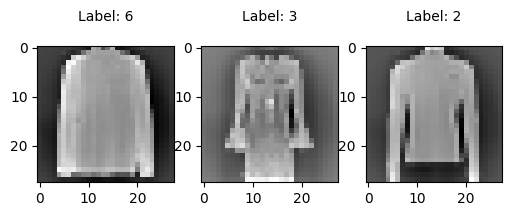

In [9]:
# View dataset
plt.figure(figsize=(6,2))
for index, (image, label) in enumerate(zip(X_train[2:5], y_train[2:5])):
  plt.subplot(1, 3, index + 1)
  plt.imshow(np.reshape(image, (28,28)), cmap='gray')
  plt.title('Label: %i\n' % label, fontsize = 10)

We choose the Logistic Regression model as our linear classifier, and test how the parameter of maximum iteration affects the model's performance.

In [ ]:
# Define a range of maximum iterations
max_iter_list = [10, 50, 100, 150, 200]

# Lists to store corresponding accuracies and losses
accuracy_list = []
log_loss_list = []

# Iterate over different maximum iterations
for max_iter in max_iter_list:
    # Create and train the logistic regression model
    model = LogisticRegression(max_iter=max_iter, solver='lbfgs', random_state=42)
    model.fit(X_train, y_train)

    # Evaluate accuracy on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

    # Compute log loss
    y_probs = model.predict_proba(X_test)
    loss = log_loss(y_test, y_probs)
    log_loss_list.append(loss)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

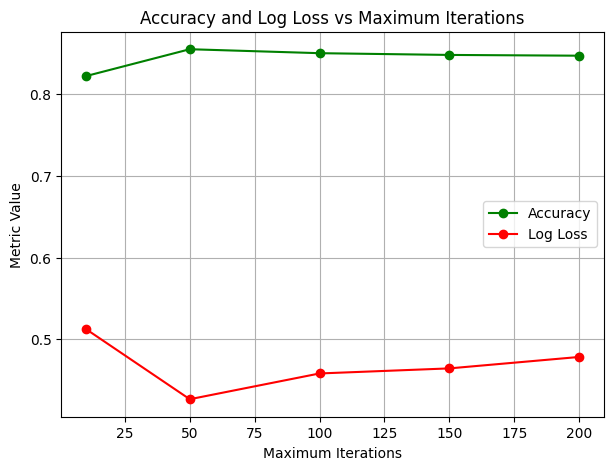

In [ ]:
# Visualize the performance based on max iterations
plt.figure(figsize=(7, 5))
plt.plot(max_iter_list, accuracy_list, marker='o', linestyle='-', label='Accuracy', color='green')
plt.plot(max_iter_list, log_loss_list, marker='o', linestyle='-', label='Log Loss', color='red')
plt.title('Accuracy and Log Loss vs Maximum Iterations')
plt.xlabel('Maximum Iterations')
plt.ylabel('Metric Value')
plt.grid(True)
plt.legend()
plt.show()

From the above line chart, we can see that a maximum iteration of 50 yields the highest accuracy and lowest loss. We can also note the ConvergenceWarning saying "TOTAL NO. of ITERATIONS REACHED LIMIT". As such, our next step is to adjust regularization and experiment with different values of the regularization parameter.

In [ ]:
# Define a range of regularization strengths
C_values_list = [0.01, 0.1, 1, 10, 100]

# Lists to store corresponding accuracies
C_accuracy_list = []
C_log_loss_list = []

# Iterate over different regularization strengths
for C in C_values_list:
    # Create and train the logistic regression model
    model = LogisticRegression(max_iter=50, random_state=42, C=C)
    model.fit(X_train, y_train)

    # Evaluate accuracy on the test set
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    C_accuracy_list.append(accuracy)

    # Compute log loss
    y_probs = model.predict_proba(X_test)
    loss = log_loss(y_test, y_probs)
    C_log_loss_list.append(loss)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

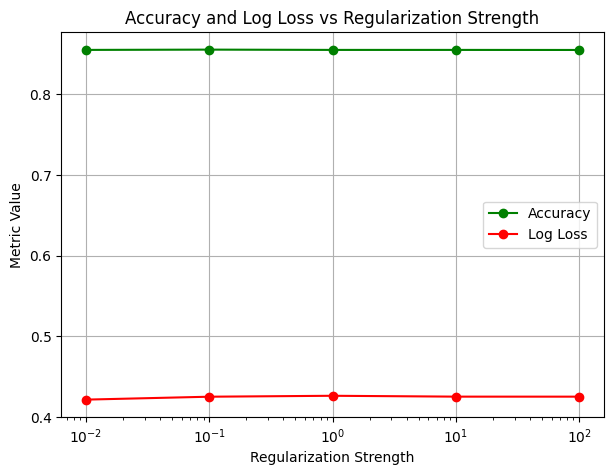

In [ ]:
# Visualize the performance based on regularization strength
plt.figure(figsize=(7, 5))
plt.plot(C_values_list, C_accuracy_list, marker='o', linestyle='-', label='Accuracy', color='green')
plt.plot(C_values_list, C_log_loss_list, marker='o', linestyle='-', label='Log Loss', color='red')
plt.xscale('log')
plt.title('Accuracy and Log Loss vs Regularization Strength')
plt.xlabel('Regularization Strength')
plt.ylabel('Metric Value')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print("Highest accuracy:", max(C_accuracy_list))
print("Lowest loss:", min(C_log_loss_list))

Highest accuracy: 0.8555714285714285
Lowest loss: 0.4216375371108237
